In [14]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from time import sleep

# 🔹 Load the original CSV file
df = pd.read_csv('datafest-data-read-only/Leases.csv')

# 🔹 Select only the relevant columns
df = df[['address', 'city', 'state']]

# 🔹 Combine address parts into a full string
df['full_address'] = df['address'] + ', ' + df['city'] + ', ' + df['state']

# 🔹 Set up OpenStreetMap Nominatim geocoder
geolocator = Nominatim(user_agent="address_converter")

# 🔹 Geocoding function
def geocode(address):
    try:
        location = geolocator.geocode(address)
        if location:
            return pd.Series([location.latitude, location.longitude])
    except Exception as e:
        print(f"Error with address: {address} -> {e}")
    return pd.Series([None, None])

# 🔹 Loop through and collect coordinates
latitudes = []
longitudes = []

for addr in df['full_address']:
    print(f"Geocoding: {addr}")
    lat, lon = geocode(addr)
    latitudes.append(lat)
    longitudes.append(lon)
    sleep(1)

# 🔹 Add lat/lon to the DataFrame
df['latitude'] = latitudes
df['longitude'] = longitudes

# 🔹 Drop the full address column
df.drop(columns=['full_address'], inplace=True)

# 🔹 Save final output
df.to_csv('/Users/mac/Duke-Datafest2025/AddressConvertionTool/AddressSheet_with_coords.csv', index=False)
print("✅ Done! File saved as AddressSheet_with_coords.csv")


Geocoding: 10 Glenlake Pky NE, Atlanta, GA
Geocoding: 3330 Cumberland Blvd, Atlanta, GA
Geocoding: 1000 Parkwood Cir SE, Atlanta, GA
Geocoding: 1100 Circle 75 Pky SE, Atlanta, GA
Geocoding: 1200 Ashwood Pky, Atlanta, GA
Geocoding: 1200 Ashwood Pky, Atlanta, GA
Geocoding: 2 Sun Ct, Peachtree Corners, GA
Geocoding: 200 Ashford Ctr N, Atlanta, GA
Error with address: 200 Ashford Ctr N, Atlanta, GA -> HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=200+Ashford+Ctr+N%2C+Atlanta%2C+GA&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Geocoding: 271 17th St NW, Atlanta, GA
Geocoding: 271 17th St NW, Atlanta, GA
Geocoding: 311 Green St NW, Gainesville, GA
Geocoding: 315 W Ponce De Leon Ave, Decatur, GA
Geocoding: 1100 Abernathy Rd NE, Atlanta, GA
Geocoding: 900 Circle 75 Pky SE, Atlanta, GA
Geocoding: 600 Peachtree St NE, Atlanta, GA
G

KeyboardInterrupt: 

In [19]:
pip install scikit-learn folium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip list | grep folium
!pip list | grep scikit-learn


folium                        0.19.5
scikit-learn                  1.4.1.post1


In [4]:
# 📦 STEP 1: Import libraries
import pandas as pd
from geopy.geocoders import Nominatim
from time import sleep
from sklearn.cluster import KMeans
import folium

# 📥 STEP 2: Load AddressSheet.csv (update the path as needed)
df = pd.read_csv('datafest-data-read-only/Leases.csv')

# 🧪 STEP 3: Use only the first 30 addresses for demonstration
df = df.head(30)

# 🧱 STEP 4: Combine into full address
df['full_address'] = df['address'] + ', ' + df['city'] + ', ' + df['state']

# 🌍 STEP 5: Set up Nominatim geocoder
geolocator = Nominatim(user_agent="real_estate_mapper")

# 📌 STEP 6: Define geocoding function
def geocode(address):
    try:
        location = geolocator.geocode(address, timeout=10)
        if location:
            return pd.Series([location.latitude, location.longitude])
    except Exception as e:
        print(f"Error geocoding {address}: {e}")
    return pd.Series([None, None])

# 🕹️ STEP 7: Geocode with a pause (to respect OSM policy)
latitudes = []
longitudes = []

for addr in df['full_address']:
    print(f"Geocoding: {addr}")
    lat, lon = geocode(addr)
    latitudes.append(lat)
    longitudes.append(lon)
    sleep(1)

df['latitude'] = latitudes
df['longitude'] = longitudes

# 🧼 Remove rows with missing coordinates
df = df.dropna(subset=['latitude', 'longitude']).reset_index(drop=True)

# 🎯 STEP 8: Cluster into 10 groups using KMeans
coords = df[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=10, random_state=42)
df['cluster'] = kmeans.fit_predict(coords)

# 🗺️ STEP 9: Create a folium map
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()
map_clusters = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# 🎨 Optional: Define marker colors for each cluster
colors = [
    'red', 'blue', 'green', 'purple', 'orange',
    'darkred', 'lightblue', 'lightgreen', 'pink', 'cadetblue'
]

# 🖼️ STEP 10: Plot markers
for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        color=colors[row['cluster'] % len(colors)],
        fill=True,
        fill_opacity=0.8,
        popup=row['full_address']
    ).add_to(map_clusters)

# 💾 STEP 11: Save and show map
map_clusters.save('leased_area_clusters_map.html')
print("✅ Map saved as 'leased_area_clusters_map.html'")

# 🖼️ Plot markers
for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        color=colors[row['cluster'] % len(colors)],
        fill=True,
        fill_opacity=0.8,
        popup=row['full_address']
    ).add_to(map_clusters)

# 🧭 Show the map right here in the notebook
from IPython.display import display
display(map_clusters)


Geocoding: 10 Glenlake Pky NE, Atlanta, GA
Geocoding: 3330 Cumberland Blvd, Atlanta, GA
Geocoding: 1000 Parkwood Cir SE, Atlanta, GA
Geocoding: 1100 Circle 75 Pky SE, Atlanta, GA
Geocoding: 1200 Ashwood Pky, Atlanta, GA
Geocoding: 1200 Ashwood Pky, Atlanta, GA
Geocoding: 2 Sun Ct, Peachtree Corners, GA
Geocoding: 200 Ashford Ctr N, Atlanta, GA
Geocoding: 271 17th St NW, Atlanta, GA
Geocoding: 271 17th St NW, Atlanta, GA
Geocoding: 311 Green St NW, Gainesville, GA
Geocoding: 315 W Ponce De Leon Ave, Decatur, GA
Geocoding: 1100 Abernathy Rd NE, Atlanta, GA
Geocoding: 900 Circle 75 Pky SE, Atlanta, GA
Geocoding: 600 Peachtree St NE, Atlanta, GA
Geocoding: 5825 Glenridge Dr NE, Atlanta, GA
Geocoding: 3850 Holcomb Bridge Rd, Peachtree Corners, GA
Geocoding: 17 Executive Park Dr NE, Atlanta, GA
Geocoding: 50 Executive Park South NE, Atlanta, GA
Geocoding: 57 Executive Park Dr NE, Atlanta, GA
Geocoding: 300 W Wieuca Rd NE, Atlanta, GA
Geocoding: 101 Marietta St NW, Atlanta, GA
Geocoding: 730 

/tmp/ipykernel_2623/3230607690.py:39: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


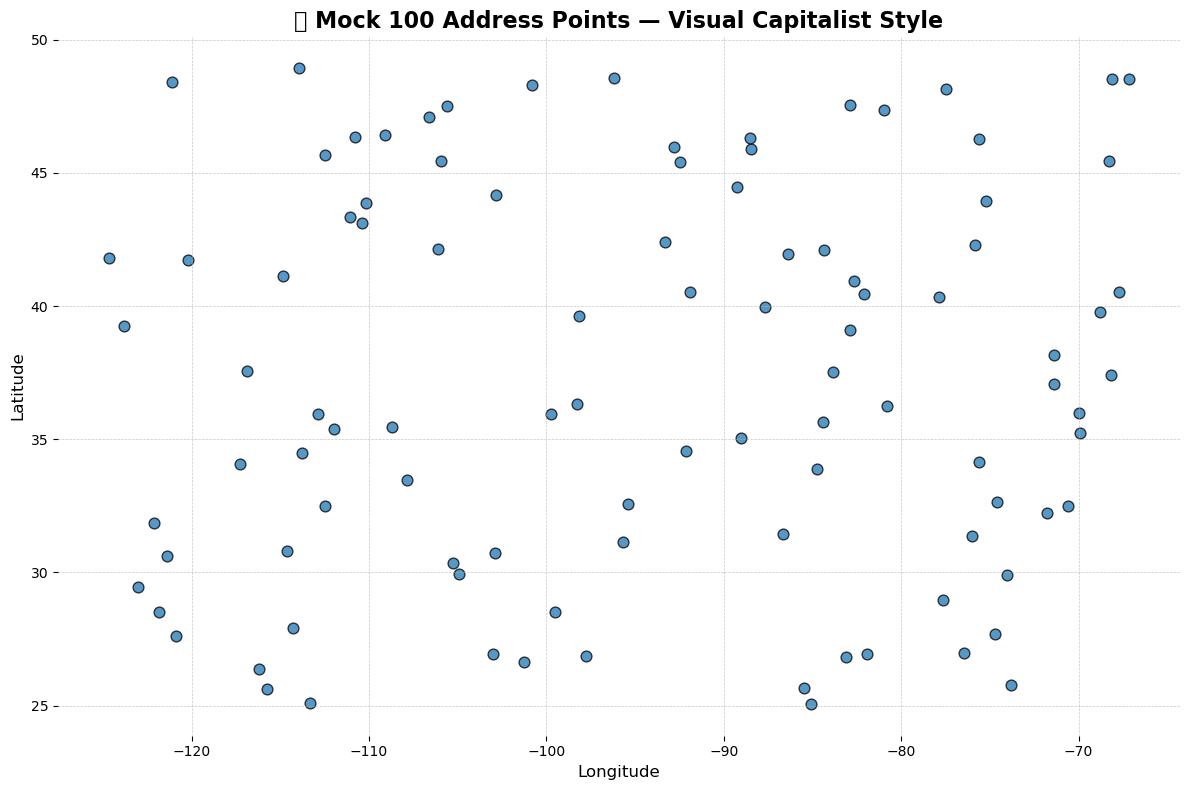

In [5]:
# 📦 Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import random

# 📄 Step 1: Generate mock data
# Random U.S. cities (feel free to replace with real ones)
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix",
          "Philadelphia", "San Antonio", "San Diego", "Dallas", "San Jose"]

states = ["NY", "CA", "IL", "TX", "AZ", "PA", "TX", "CA", "TX", "CA"]

# Create a fake address DataFrame
data = []
for _ in range(100):
    index = random.randint(0, len(cities) - 1)
    city = cities[index]
    state = states[index]
    address = f"{random.randint(100, 9999)} Random St"
    lat = round(random.uniform(25.0, 49.0), 6)   # latitude in US range
    lon = round(random.uniform(-125.0, -67.0), 6) # longitude in US range
    data.append([address, city, state, lat, lon])

df = pd.DataFrame(data, columns=["address", "city", "state", "latitude", "longitude"])

# 🗺️ Step 2: Plot
plt.figure(figsize=(12, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.75, s=60, edgecolor='black')

# Visual Capitalist-style aesthetics
plt.title("📍 Mock 100 Address Points — Visual Capitalist Style", fontsize=16, fontweight='bold')
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor('#f8f8f8')
plt.box(False)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# 🖼️ Show the map
plt.show()


In [14]:
pip install pyogrio


Note: you may need to restart the kernel to use updated packages.


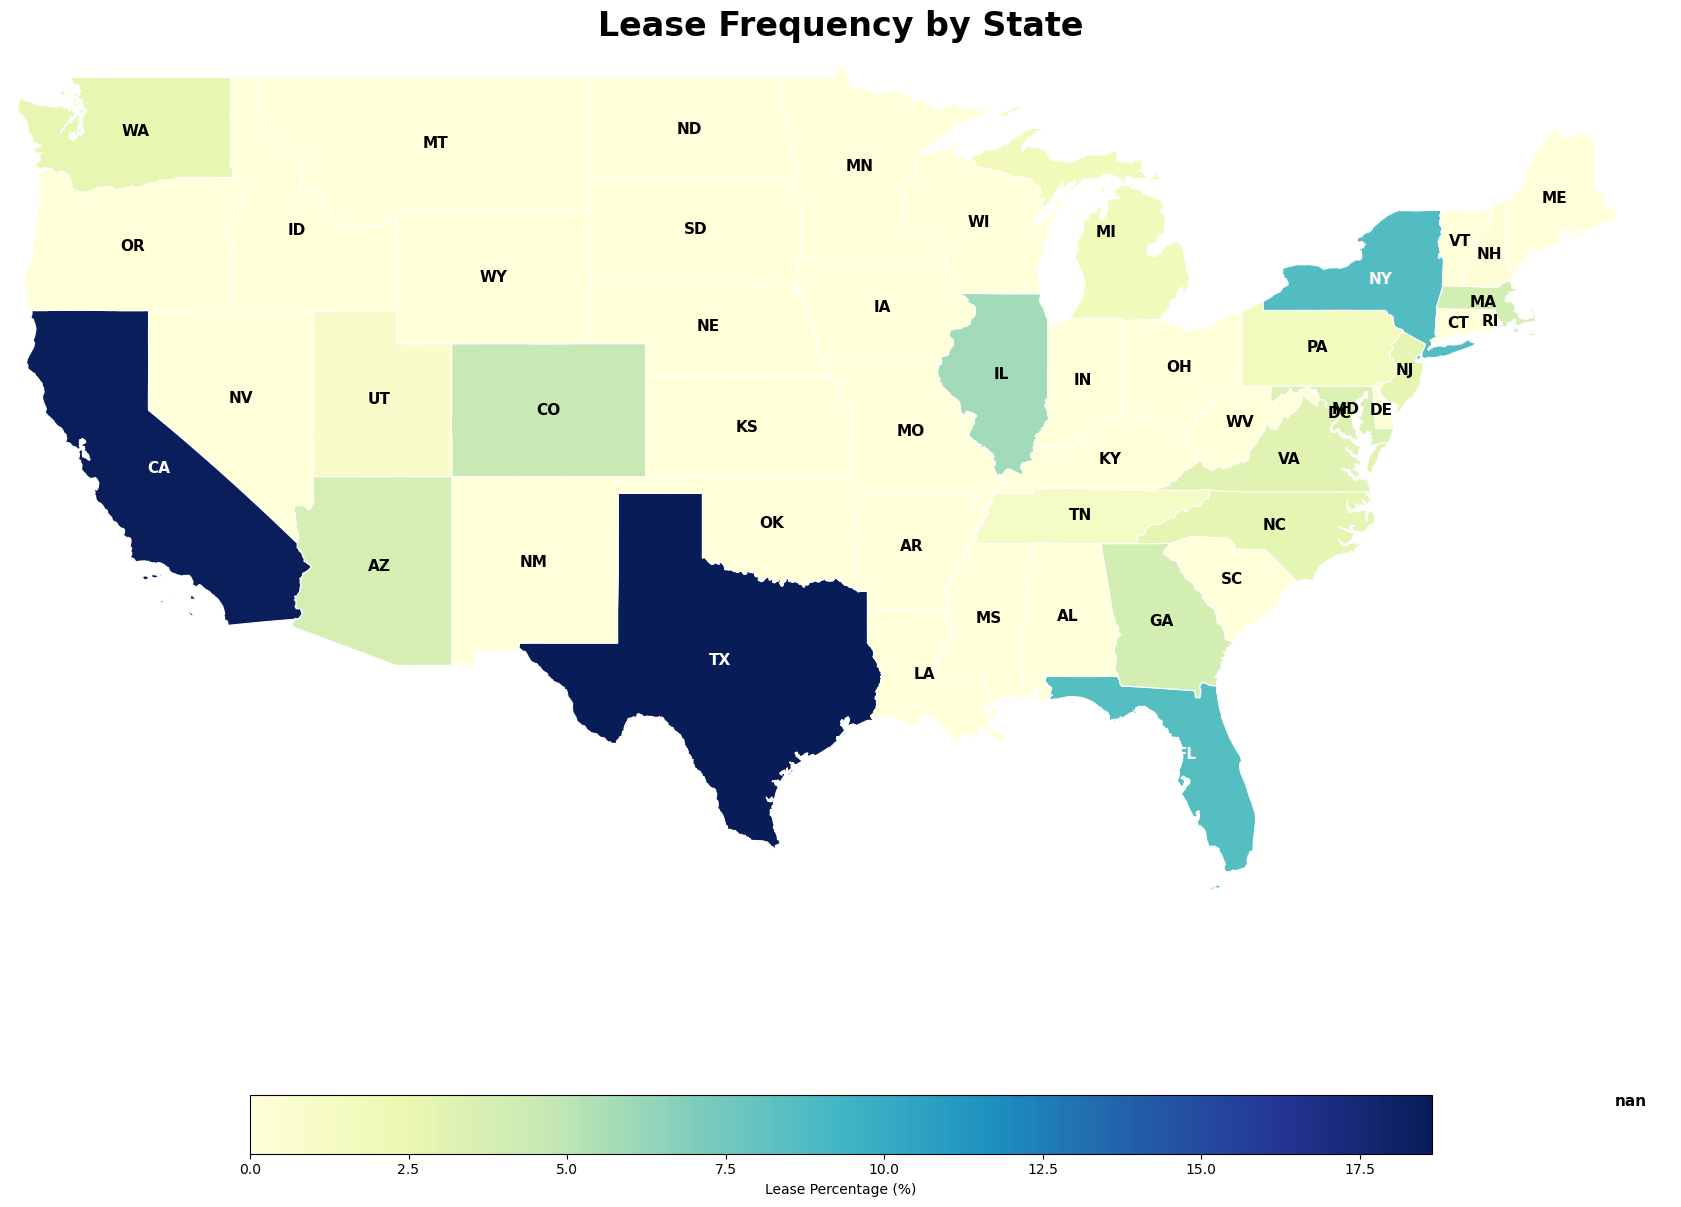

In [45]:
# 🗺️ Plot base map
fig, ax = plt.subplots(figsize=(20, 13))  # Bigger figure
map_df.plot(
    column='percent',
    cmap=cmap_obj,
    norm=norm,
    linewidth=0.8,
    edgecolor='white',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Lease Percentage (%)",
        'shrink': 0.6,
        'orientation': "horizontal"
    }
)

# 🧠 Brightness-based text color
def get_text_color(rgb):
    r, g, b = [int(x * 255) for x in rgb[:3]]
    brightness = (r * 299 + g * 587 + b * 114) / 1000
    return 'black' if brightness > 160 else 'white'

# 🏷️ Label states
for _, row in map_df.iterrows():
    color_rgb = cmap_obj(norm(row['percent']))
    text_color = get_text_color(color_rgb)
    ax.text(row['label_x'], row['label_y'], row['state'],
            ha='center', va='center', fontsize=11, fontweight='bold', color=text_color)

# 💅 Layout and zoom in
ax.set_title("Lease Frequency by State", fontsize=24, fontweight='bold')
ax.axis('off')
ax.set_xlim(-125, -65)
ax.set_ylim(24, 50)
plt.tight_layout()

# 💾 Save as high-res PNG
plt.savefig("lease_map_large.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
from time import sleep

# 🎯 Sample 200 addresses
sample_df = df.sample(n=200, random_state=42)
sample_df['full_address'] = sample_df['address'] + ', ' + sample_df['city'] + ', ' + sample_df['state']

# 🌍 Geocoder
geolocator = Nominatim(user_agent="lease_mapper")
def geocode(addr):
    try:
        loc = geolocator.geocode(addr, timeout=10)
        if loc:
            return pd.Series([loc.latitude, loc.longitude])
    except:
        return pd.Series([None, None])
    return pd.Series([None, None])

# ⏳ Loop with respect to rate limit
coords = sample_df['full_address'].apply(geocode)
coords.columns = ['lat', 'lon']
sample_df[['lat', 'lon']] = coords
sample_df.dropna(subset=['lat', 'lon'], inplace=True)
sleep(1)  # polite pause

# 🎯 Cluster lat/lon
kmeans = KMeans(n_clusters=10, random_state=42)
sample_df['cluster'] = kmeans.fit_predict(sample_df[['lat', 'lon']])
